In [2]:
import numpy as np
import pandas
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input Cells

In [3]:
demography = pd.read_excel('data/all.xlsx')

In [4]:
demography = demography.drop('ID', axis=1)

# Weekly income + Quality

In [5]:
# demography[demography['Favourite category'] == 'Asian cuisine'].mode()

In [6]:
demography.groupby('Favourite category').mean()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.341935,72.561290,0.426645
Czech cuisine,53.896739,55.793478,0.393967
Italian cuisine,51.000000,82.360248,0.436832


In [7]:
demography.groupby('Favourite category').median()

,Age,Weekly income,Preferred quality
Favourite category,,,
Asian cuisine,53.0,44.0,0.38
Czech cuisine,54.0,38.0,0.34
Italian cuisine,53.0,45.0,0.37


# Favourite category

In [8]:
demography.value_counts('Favourite category')

Favourite category
Czech cuisine      184
Italian cuisine    161
Asian cuisine      155
dtype: int64

<AxesSubplot:ylabel='None'>

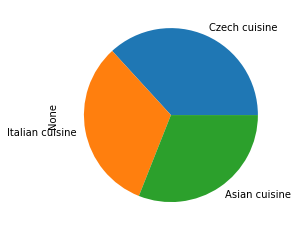

In [9]:
demography.value_counts('Favourite category').plot(kind='pie')

# Ad Type

In [10]:
demography.value_counts('Favourite ad type')

Favourite ad type
promo stand big          244
print-on-bus              79
citylight                 68
promo stand small         39
billboard                 33
hostess on the street     33
radio spot                 4
dtype: int64

# Ad Type by Category (Asia, Czechia, Italia)

In [11]:
cat_ad_graph = demography[['Favourite ad type', 'Favourite category']].groupby('Favourite ad type').value_counts()\
    .unstack()

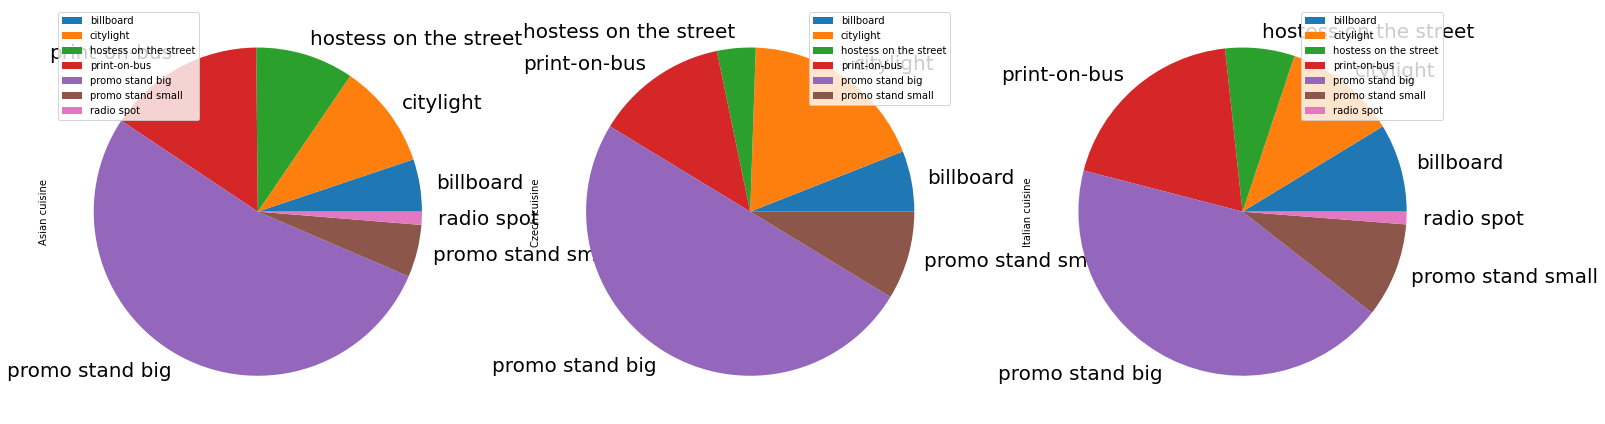

In [12]:
cat_ad_graph.plot(subplots=True, kind='pie', figsize=(25,25), fontsize=20);

In [13]:
asian = cat_ad_graph['Asian cuisine'].reset_index()

In [14]:
czech = cat_ad_graph['Czech cuisine'].reset_index()

In [15]:
italia =  cat_ad_graph['Italian cuisine'].reset_index()

#================================================

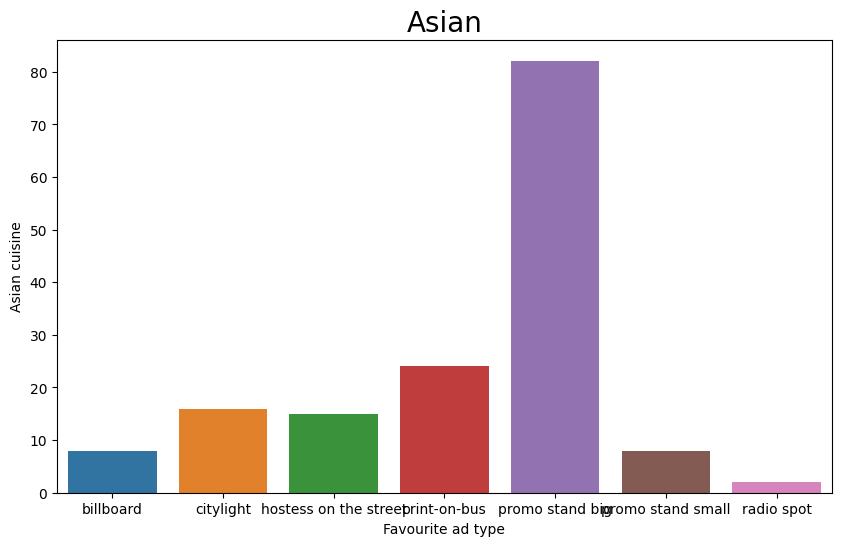

In [16]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine')
plt.title('Asian', fontsize=20);

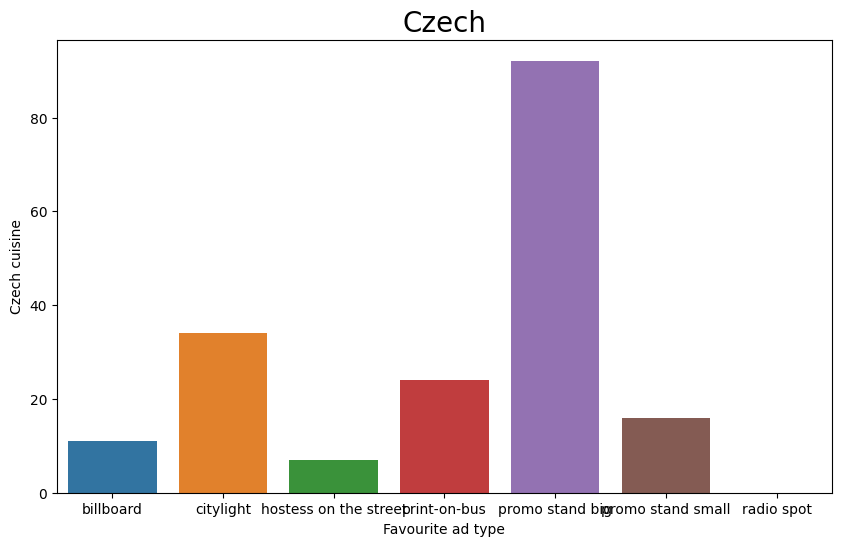

In [17]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine')
plt.title('Czech', fontsize=20);

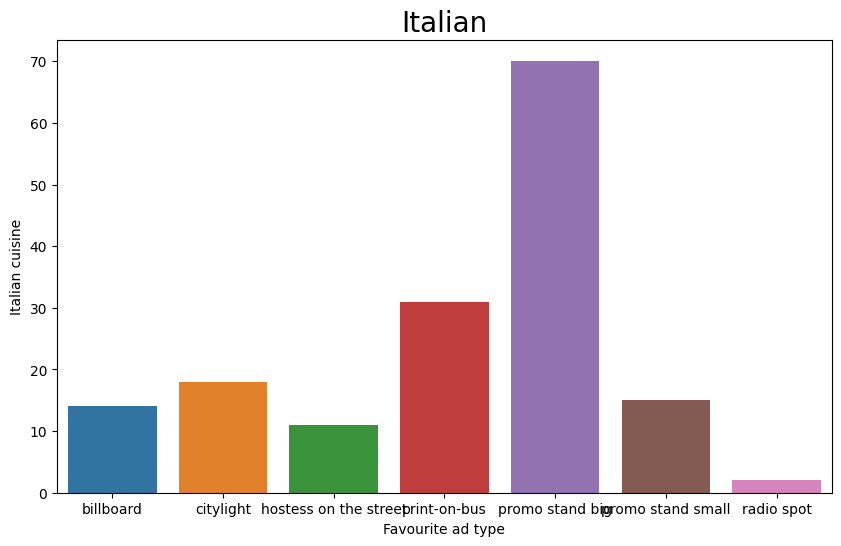

In [18]:
plt.figure(figsize=(10,6), dpi=100)
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine')
plt.title('Italian', fontsize=20);

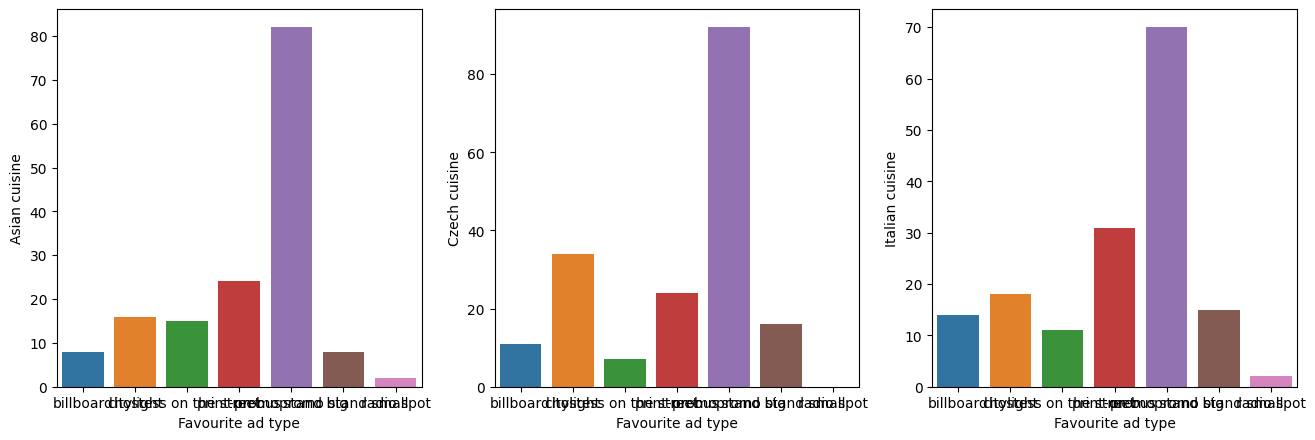

In [19]:
fig, axes = plt.subplots(ncols=3, figsize=(16,5), dpi=100)

sns.barplot(data=asian, x='Favourite ad type', y='Asian cuisine', ax=axes[0])
sns.barplot(data=czech, x='Favourite ad type', y='Czech cuisine', ax=axes[1])
sns.barplot(data=italia, x='Favourite ad type', y='Italian cuisine', ax=axes[2]);

# Более точная выборка дней по кухне и рекламе

In [30]:
cuisine = demography['Favourite category'] == 'Czech cuisine'

In [31]:
ad = demography['Favourite ad type'] == 'promo stand big'

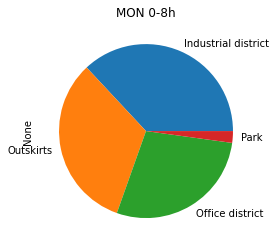

In [45]:
demography[cuisine & ad].value_counts('MON 0-8h').plot(kind='pie', title='MON 0-8h');

In [ ]:
cz_df = demography[demography['Favourite category'] == 'Czech cuisine']

In [ ]:
cz_df[demography['Favourite ad type'] == 'promo stand big'].describe()

# WIP

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(demography['Weekly income'], demography['Preferred quality'])

In [ ]:
demography.groupby(['Favourite category']).describe(include=['object'])

## Excel


In [ ]:
weather = pd.read_excel('data/excel/Section3_Logical_Operators.xlsx')

In [ ]:
ex = pd.read_excel('data/excel/Section2_Formulas101.xlsx')

### getting dd/mm/yy

In [ ]:
ex['Birth Year'] = pd.DatetimeIndex(ex['Birth Date']).year

### getting first 3 characters form string

In [ ]:
ex['Area Code'] = ex['Telephone'].str[:3]

### getting username from emails

In [ ]:
ex['Username'] = ex['E-mail'].str.split('@').str[0]

### upload to excel

In [ ]:
# ex.to_excel('data/Section2_Formulas101.xlsx', index=False)

In [ ]:
weather

In [ ]:
def freeze(x):
    if x < 32:
        return 'Yes'
    return 'No'

In [ ]:
def climate(x):
    if x < 40:
        return 'Cold'
    elif x > 80:
        return 'Hot'
    return 'Mild'

In [ ]:
weather['Freeze'] = weather['TEMP (F)'].apply(freeze)
weather['Climate'] = weather['TEMP (F)'].apply(climate)

In [ ]:
def prcp(x,y):
    if x == 'Yes' and y > 0:
        return 'Snow'
    elif x == 'No' and y > 0:
        return 'Rain'
    return 'None'

In [ ]:
weather['PRCP Type'] = np.vectorize(prcp)(weather['Freeze'], weather['PRCP (mm)'])

In [ ]:
def conditions(x):
    if x == 'Snow':
        return 'Dry'
    return 'Wet'

In [ ]:
weather['Conditions'] = weather['PRCP Type'].apply(conditions)